In [3]:
# load imortant libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error

In [6]:
# initialize values
in_dir = 'input'
out_dir = 'output'
# print all filename present in directory
os.listdir(in_dir)

['data.csv']

In [10]:
# set the dataset file name here
data_fname = 'data.csv'
cdata_fname = 'cleaned_data.csv'
train_data_fname = 'train.csv'
test_data_fname = 'test.csv'

In [12]:
data_file_path = os.path.join(in_dir,data_fname)
print("Input file path : "+data_file_path)

Input file path : input\data.csv


In [13]:
data_as_frame = pd.read_csv(data_file_path)

In [14]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 35 columns):
date               667 non-null int64
plant_stand        647 non-null float64
precip             645 non-null float64
temp               653 non-null float64
hail               562 non-null float64
crop_hist          667 non-null int64
area_dam           667 non-null int64
sever              562 non-null float64
seed_tmt           562 non-null float64
germ               571 non-null float64
leaves             667 non-null int64
leaf_halo          583 non-null float64
leaf_marg          583 non-null float64
leaf_size          583 non-null float64
leaf_shread        583 non-null float64
leaf_malf          583 non-null float64
leaf_mild          575 non-null float64
stem               667 non-null int64
lodging            562 non-null float64
stem_cankers       645 non-null float64
canker_lesion      645 non-null float64
fruiting_bodies    577 non-null float64
ext_decay          645 no

In [15]:
data_as_frame.head(10)

,date,plant_stand,precip,temp,hail,crop_hist,area_dam,sever,seed_tmt,germ,...,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots,plant_growth
0,6,0.0,2.0,1.0,0.0,1,1,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,4,0.0,2.0,1.0,0.0,2,0,2.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,0.0,2.0,1.0,0.0,1,0,2.0,1.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,2.0,1.0,0.0,1,0,2.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6,0.0,2.0,1.0,0.0,2,0,1.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,5,0.0,2.0,1.0,0.0,3,0,1.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,5,0.0,2.0,1.0,0.0,2,0,1.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,4,0.0,2.0,1.0,1.0,1,0,1.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,6,0.0,2.0,1.0,0.0,3,0,1.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,4,0.0,2.0,1.0,0.0,2,0,2.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
data_as_frame.tail(20)

,date,plant_stand,precip,temp,hail,crop_hist,area_dam,sever,seed_tmt,germ,...,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots,plant_growth
647,6,NaN,2.0,2.0,NaN,1,3,NaN,NaN,NaN,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,0
648,5,NaN,2.0,2.0,NaN,1,3,NaN,NaN,NaN,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,0
649,6,NaN,2.0,2.0,NaN,3,3,NaN,NaN,NaN,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,0
650,6,NaN,2.0,2.0,NaN,0,3,NaN,NaN,NaN,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,0
651,1,1.0,1.0,2.0,NaN,0,0,NaN,NaN,2.0,...,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,NaN,0
652,5,0.0,2.0,2.0,NaN,1,3,NaN,NaN,0.0,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,0
653,5,0.0,2.0,2.0,NaN,3,3,NaN,NaN,0.0,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,0
654,6,0.0,2.0,2.0,NaN,3,3,NaN,NaN,1.0,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,0
655,2,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,0.0,NaN,1.0,NaN,2.0,1
656,3,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,0.0,NaN,1.0,NaN,2.0,1


In [17]:
data_as_frame.columns

Index(['date', 'plant_stand', 'precip', 'temp', 'hail', 'crop_hist',
       'area_dam', 'sever', 'seed_tmt', 'germ', 'leaves', 'leaf_halo',
       'leaf_marg', 'leaf_size', 'leaf_shread', 'leaf_malf', 'leaf_mild',
       'stem', 'lodging', 'stem_cankers', 'canker_lesion', 'fruiting_bodies',
       'ext_decay', 'mycelium', 'int_discolor', 'sclerotia', 'fruit_pods',
       'fruit_spots', 'seed', 'mold_growth', 'seed_discolor', 'seed_size',
       'shriveling', 'roots', 'plant_growth'],
      dtype='object')

In [22]:
level = data_as_frame['plant_growth'].unique()
print(level)


[1 0]


In [23]:
# gives some infos on columns types and number of null values:
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
    return tab_info


In [24]:
# to check response variable is na
data_as_frame['plant_growth'].isna().sum()

0

In [25]:
# to check response variable is na
data_as_frame['plant_growth'].isna().sum()

0

In [26]:
(data_as_frame.isna().sum() / len(data_as_frame)*100).sort_values(ascending=False)

sever              15.742129
hail               15.742129
lodging            15.742129
seed_tmt           15.742129
germ               14.392804
leaf_mild          13.793103
seed_discolor      13.493253
fruit_spots        13.493253
fruiting_bodies    13.493253
shriveling         13.493253
leaf_malf          12.593703
leaf_halo          12.593703
leaf_marg          12.593703
leaf_size          12.593703
leaf_shread        12.593703
mold_growth        11.394303
seed               11.394303
seed_size          11.394303
fruit_pods         10.194903
stem_cankers        3.298351
precip              3.298351
ext_decay           3.298351
mycelium            3.298351
int_discolor        3.298351
sclerotia           3.298351
canker_lesion       3.298351
plant_stand         2.998501
roots               2.248876
temp                2.098951
plant_growth        0.000000
stem                0.000000
crop_hist           0.000000
area_dam            0.000000
leaves              0.000000
date          

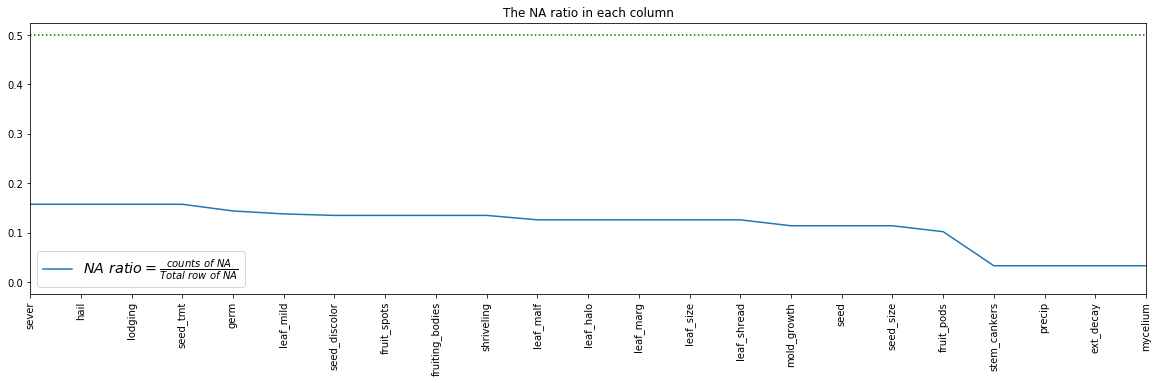

In [27]:
plt.figure(figsize=(20,5))
plt.title('The NA ratio in each column')
plt.xticks(rotation='vertical')
plt.plot([0,22],[0.5,0.5],'g:')
plt.plot((data_as_frame.isna().sum() / len(data_as_frame)).sort_values(ascending=False).index,
         (data_as_frame.isna().sum() / len(data_as_frame)).sort_values(ascending=False).values,'-',label=r'$NA \ ratio = \frac{counts \ of \ NA}{Total \ row \ of \ NA}$')
plt.xlim(0,22)
_ = plt.legend(fontsize='x-large')

In [28]:
data_as_frame.isna().sum(axis=1).value_counts().sort_index()

0     562
11      9
13     19
19     55
20      8
24     14
dtype: int64

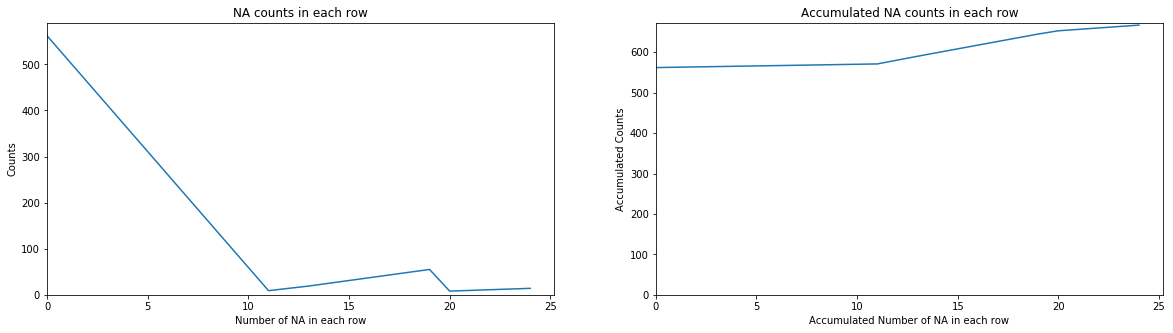

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('NA counts in each row')
plt.plot(data_as_frame.isna().sum(axis=1).value_counts().sort_index())
plt.xlabel('Number of NA in each row')
plt.ylabel('Counts')
plt.xlim(0)
plt.ylim(0)

plt.subplot(1,2,2)
plt.title('Accumulated NA counts in each row')
plt.plot(data_as_frame.isna().sum(axis=1).value_counts().sort_index().cumsum())
plt.xlabel('Accumulated Number of NA in each row')
plt.ylabel('Accumulated Counts')
plt.xlim(0)
_= plt.ylim(0)

In [30]:
th = len(data_as_frame.columns) - 5
print('Threshold value : '+ str(th))

Threshold value : 30


In [31]:
data_as_frame = data_as_frame.dropna(thresh=th)

In [32]:
nullAnalysis(data_as_frame)

,date,plant_stand,precip,temp,hail,crop_hist,area_dam,sever,seed_tmt,germ,...,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots,plant_growth
column type,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_as_frame.shape

(562, 35)

C:\Users\Thinkcenter\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Thinkcenter\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


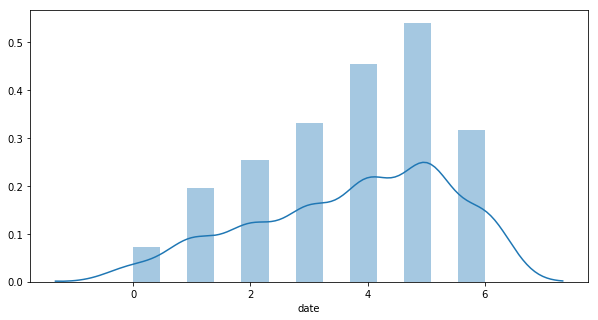

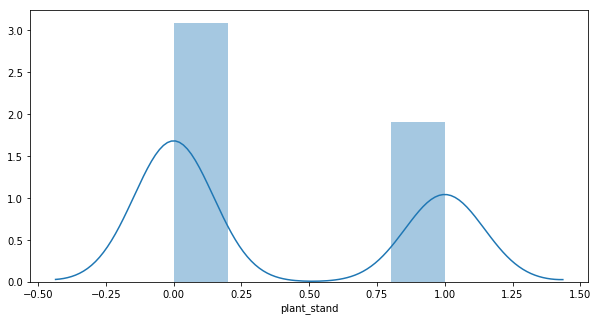

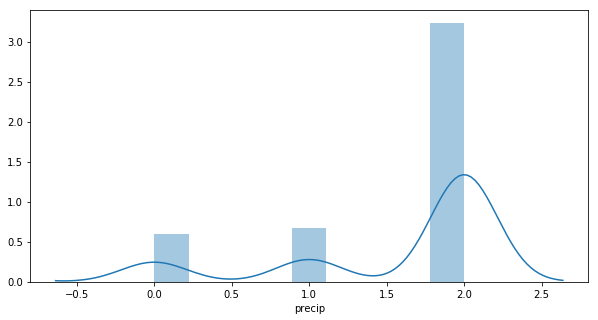

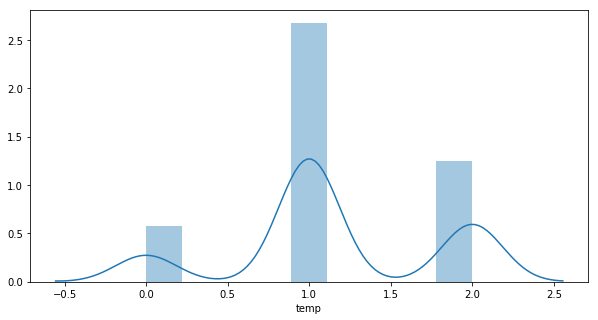

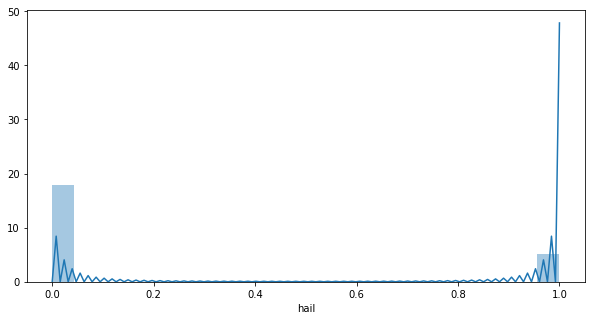

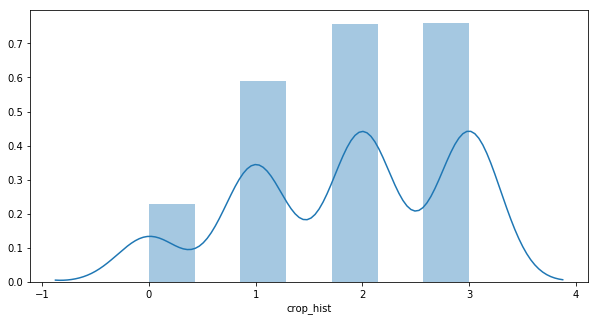

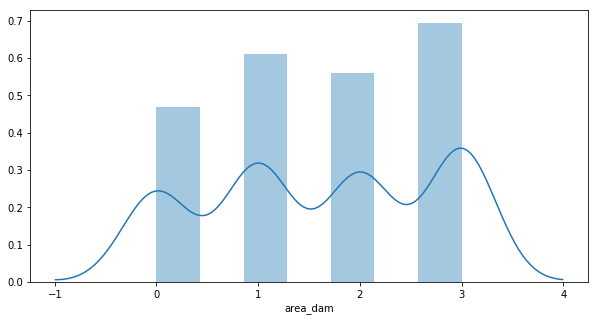

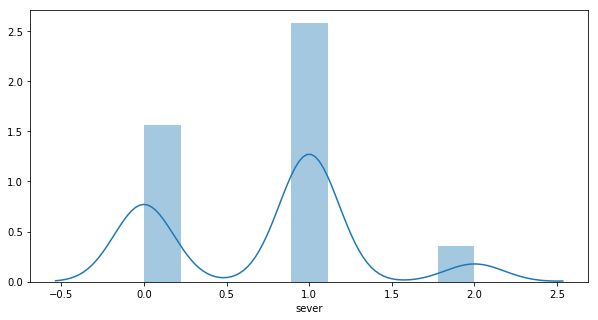

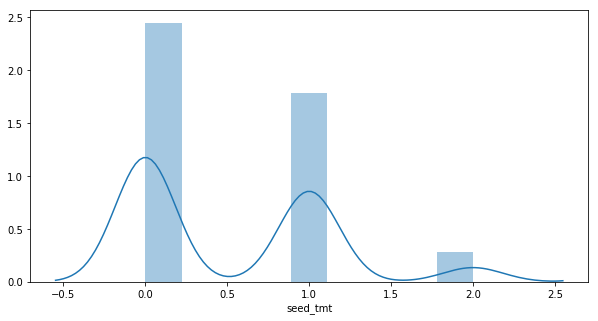

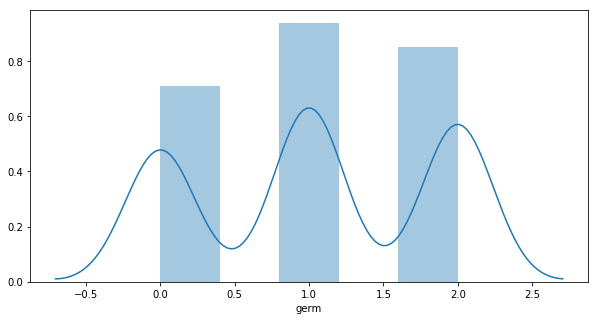

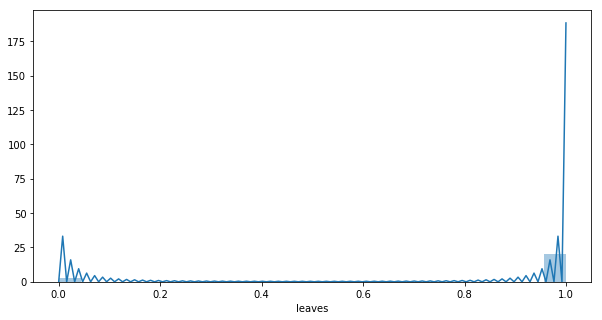

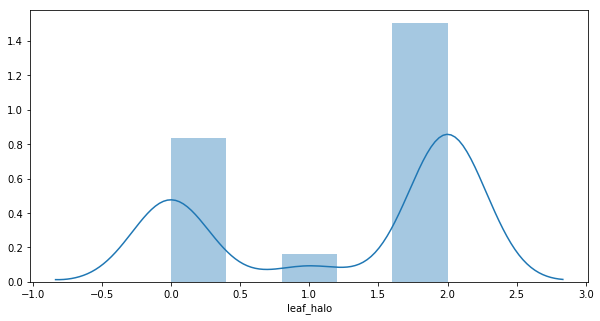

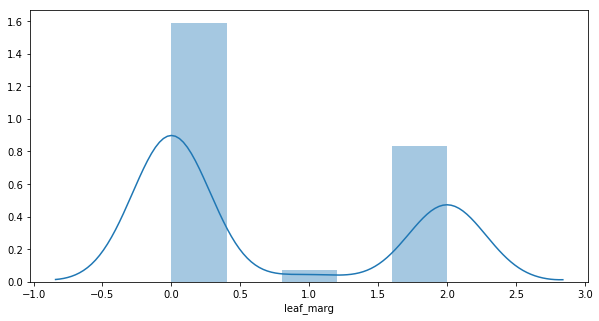

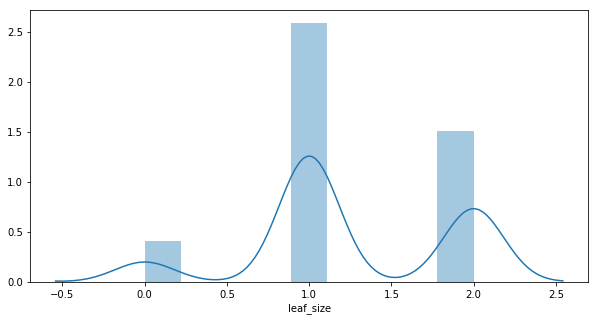

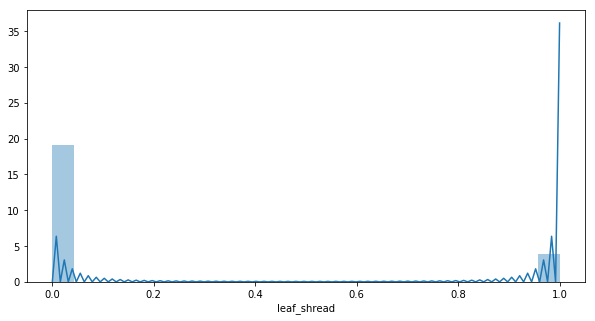

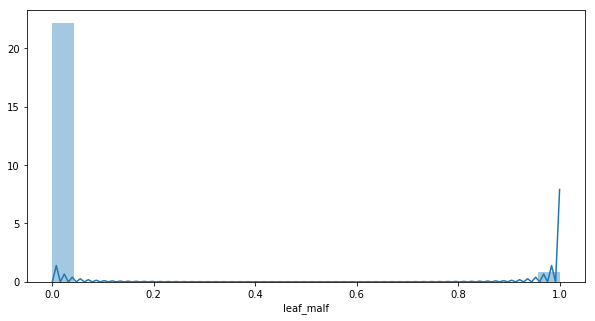

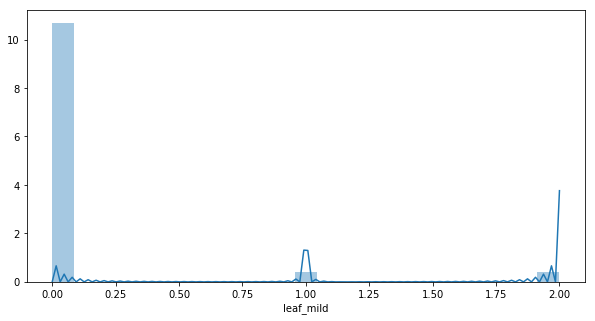

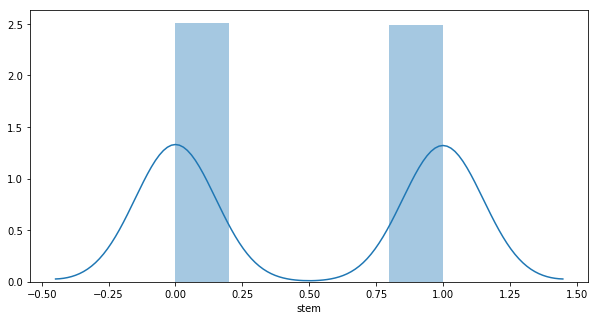

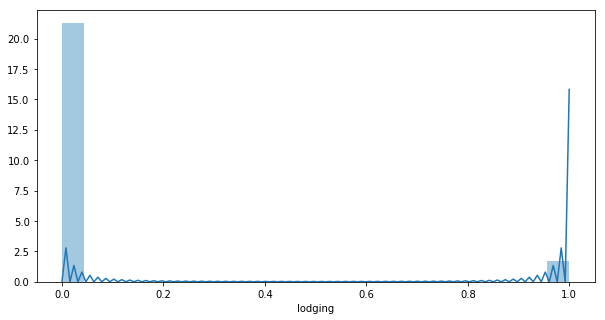

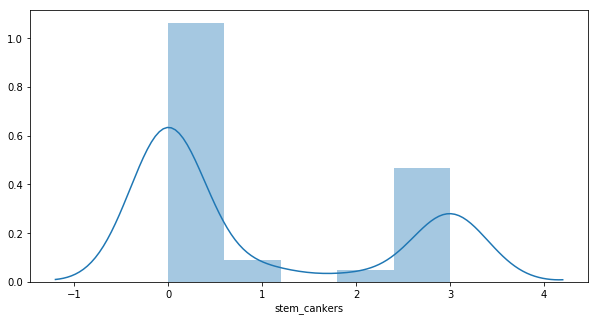

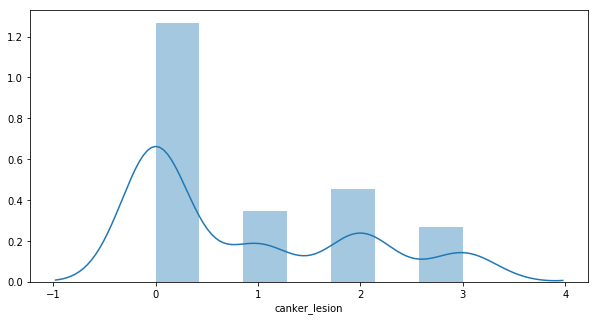

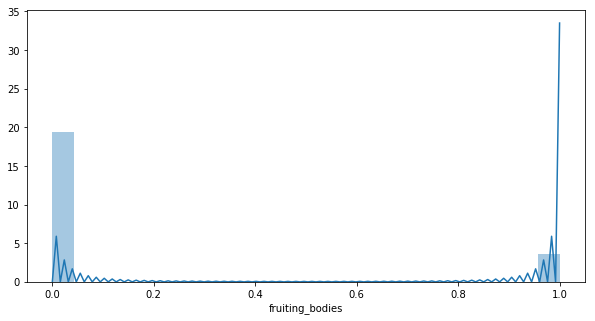

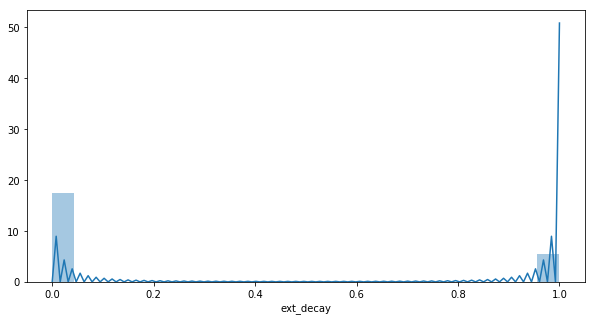

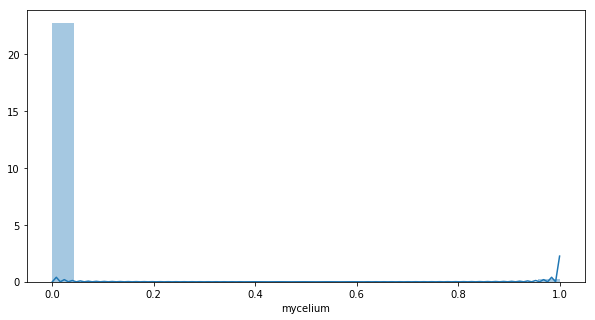

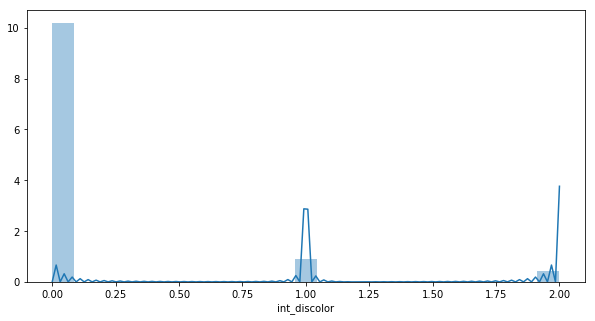

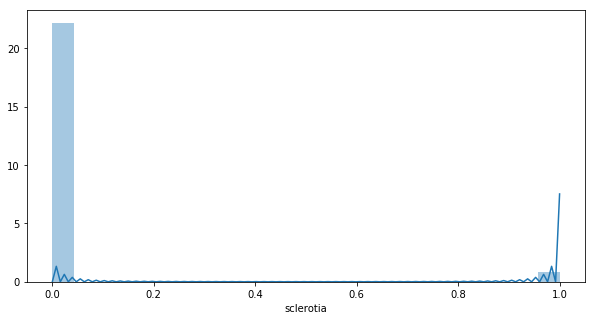

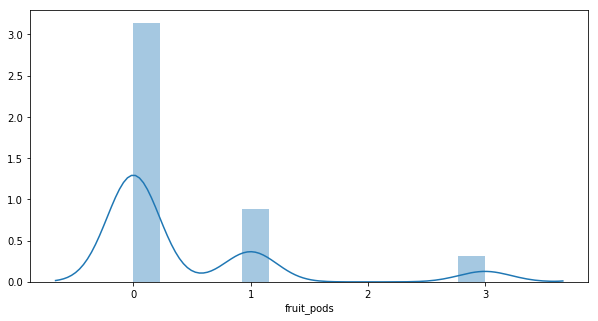

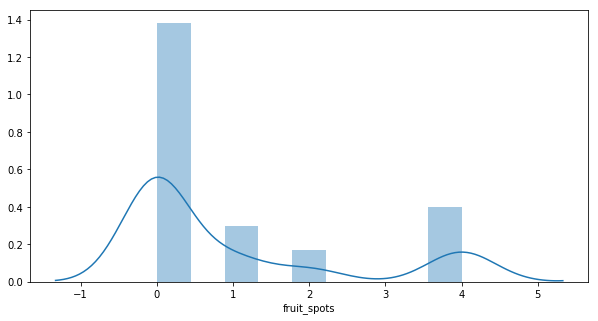

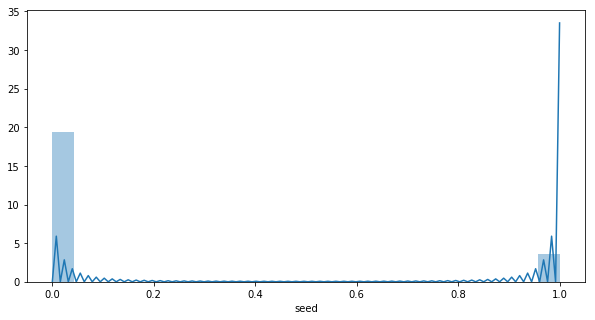

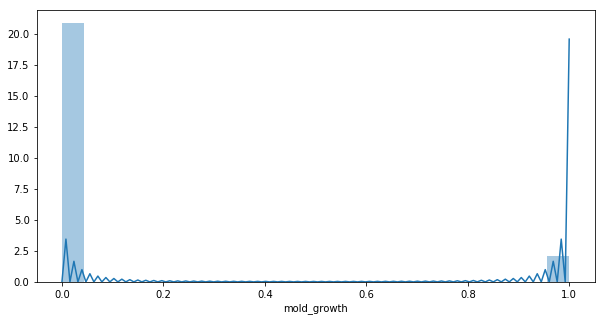

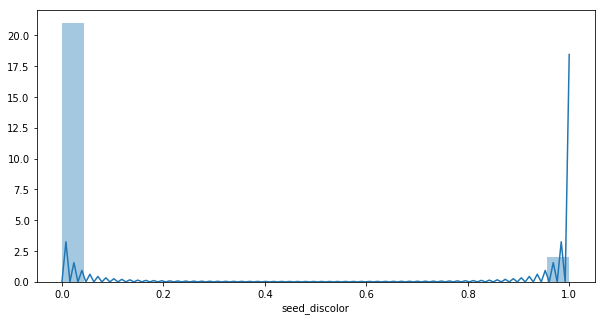

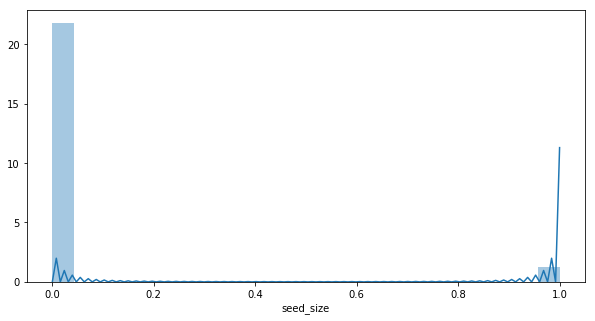

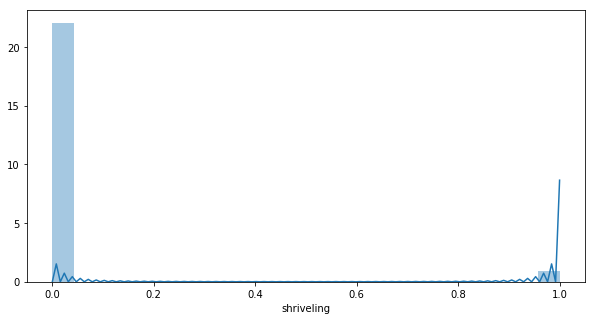

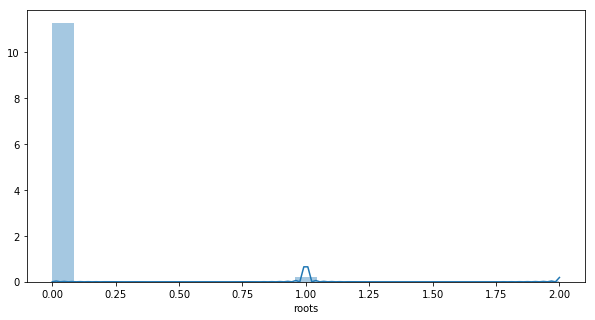

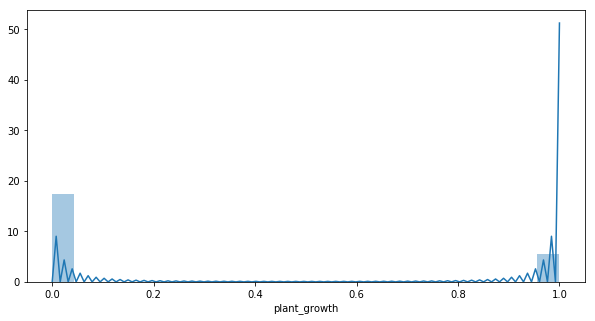

In [34]:
for number,col in enumerate(data_as_frame.columns):
    plt.figure(figsize=(10,5))
    sns.distplot(data_as_frame[col])

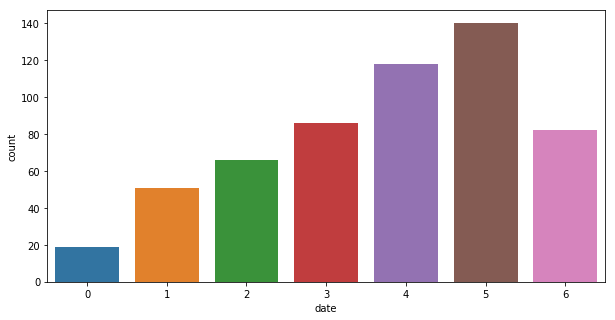

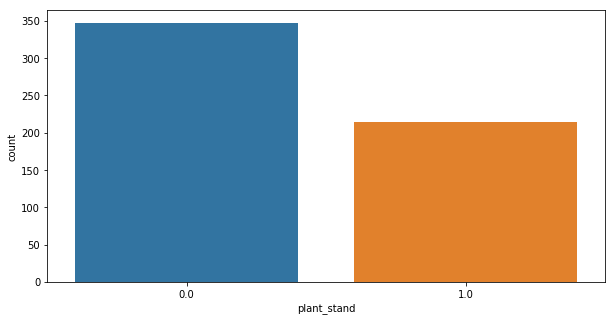

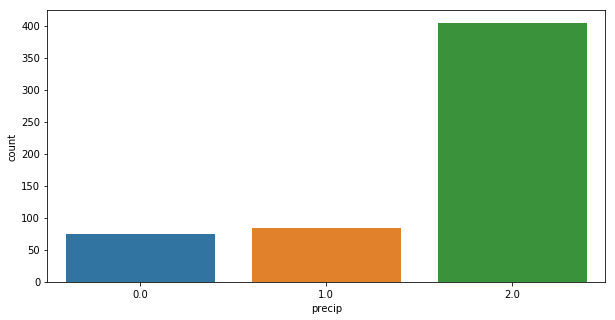

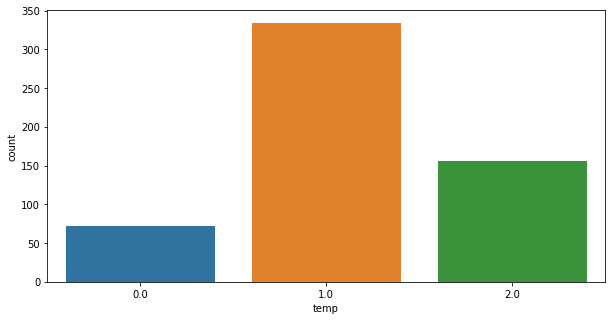

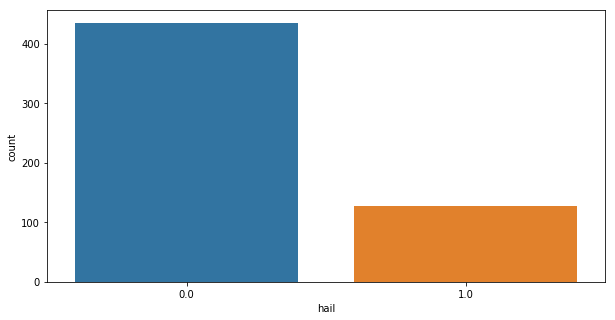

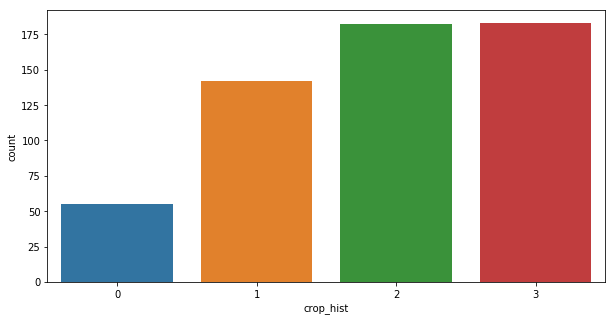

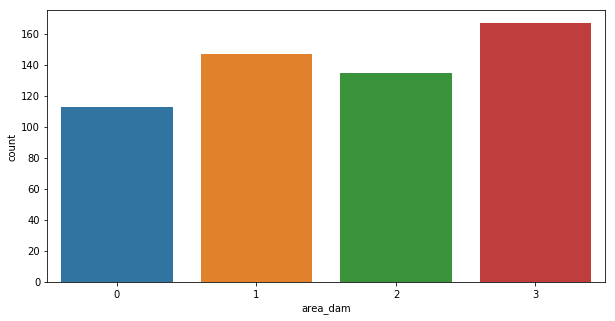

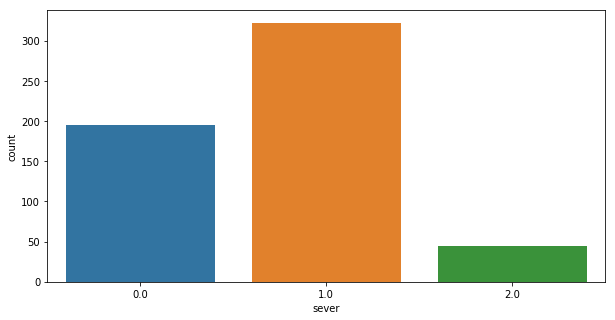

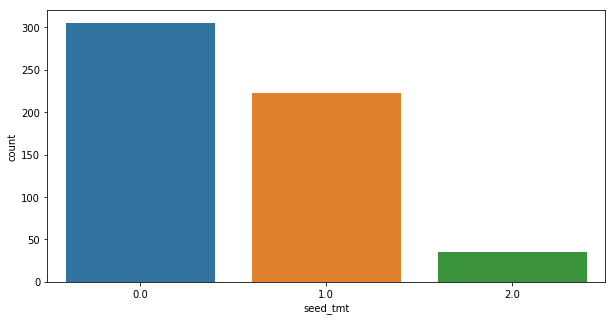

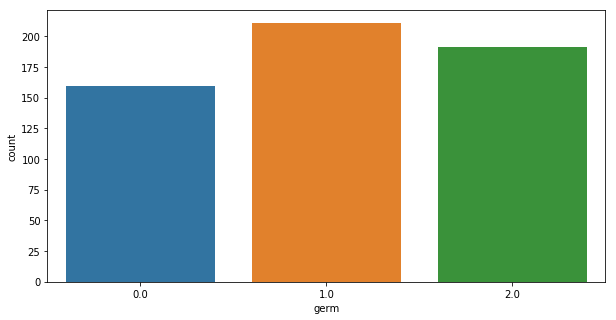

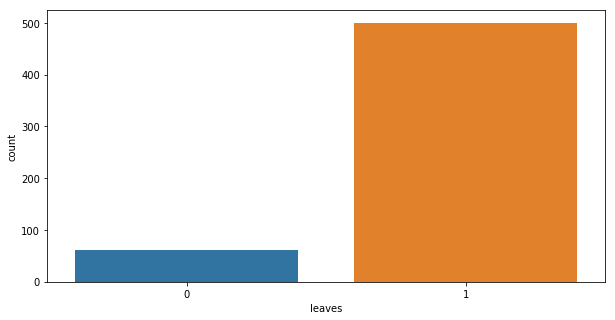

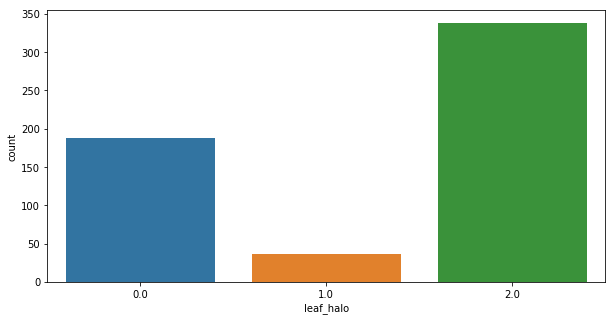

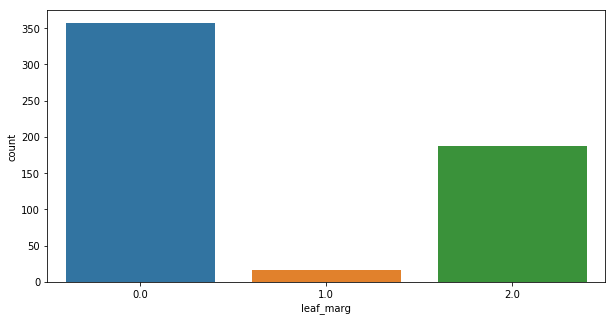

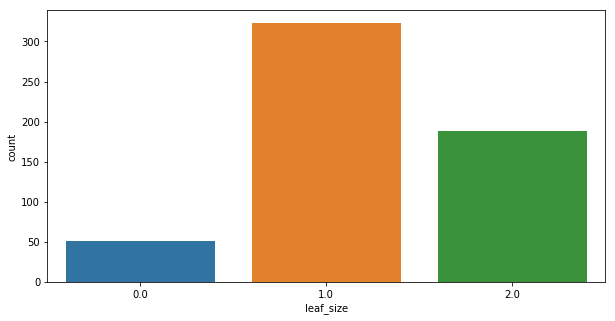

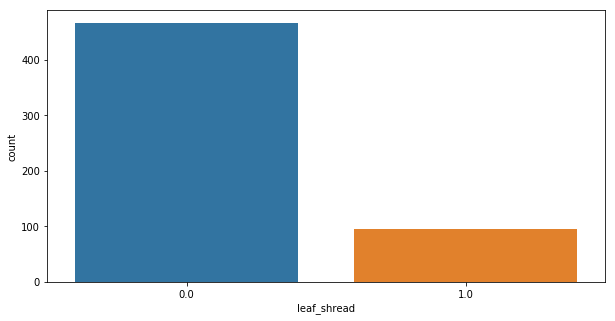

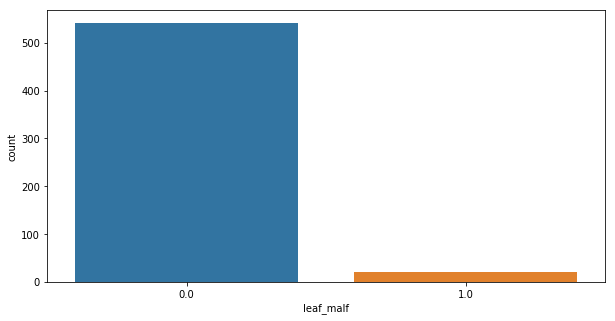

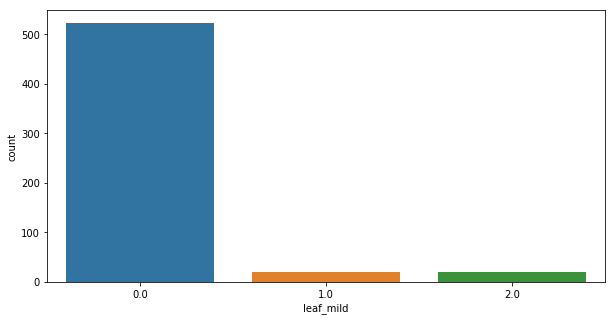

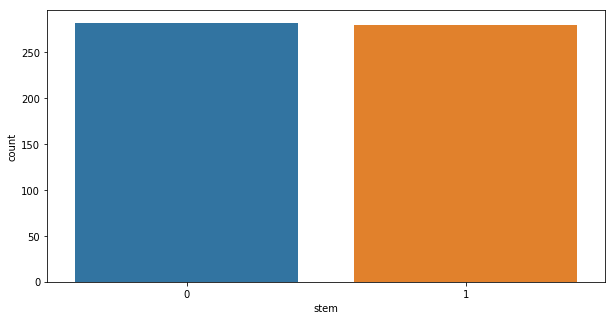

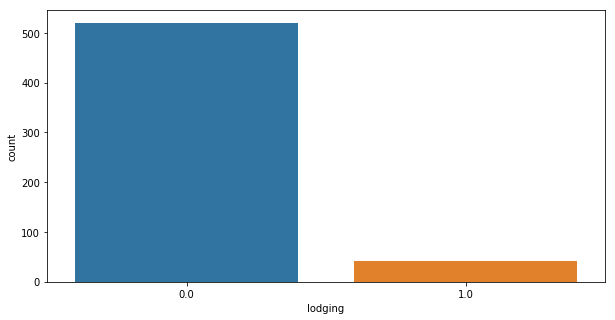

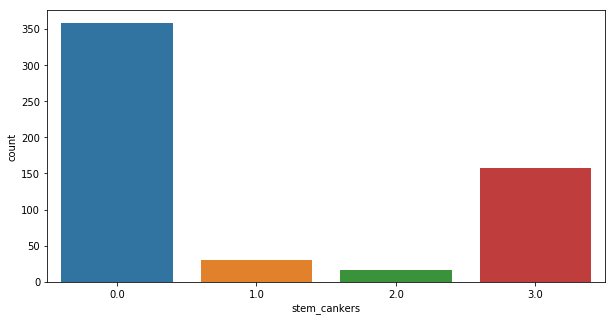

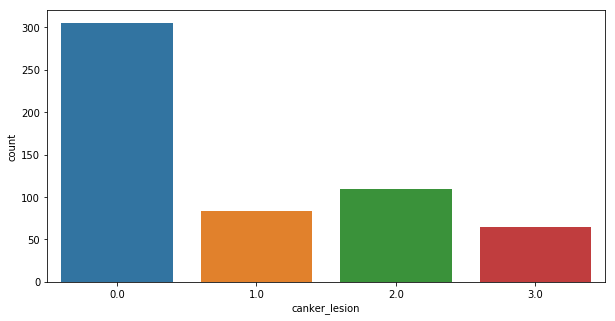

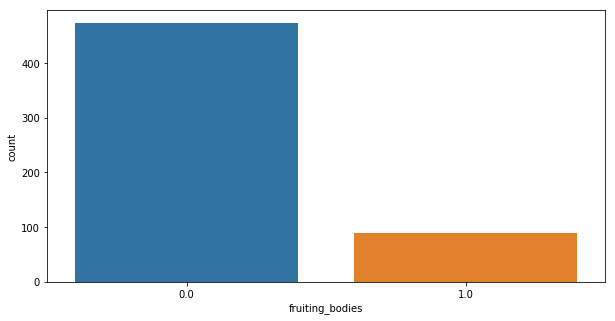

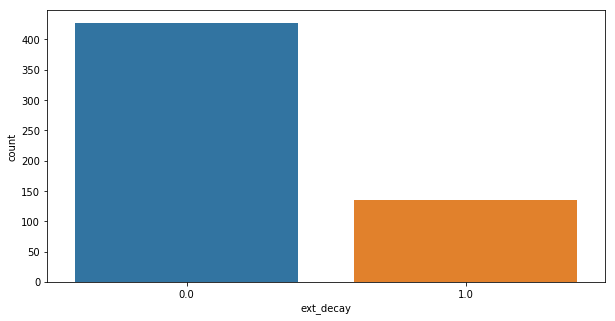

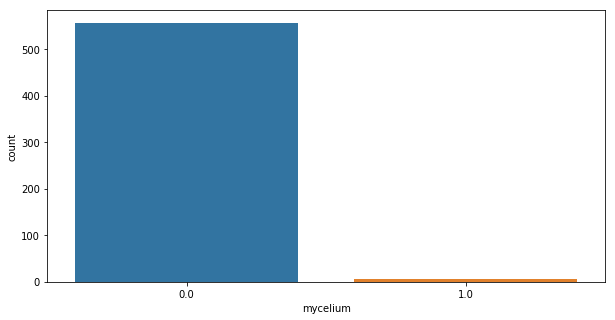

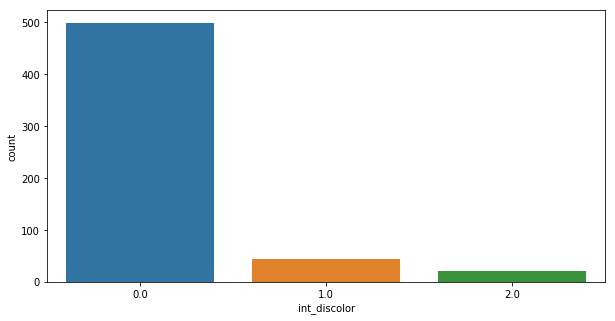

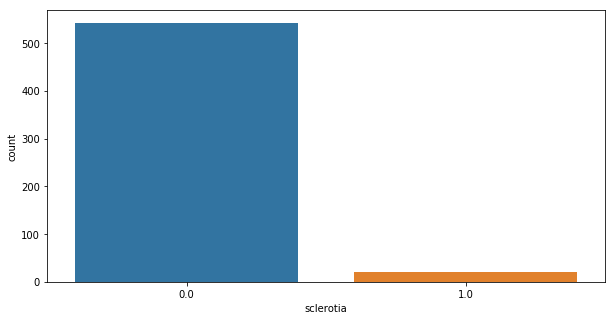

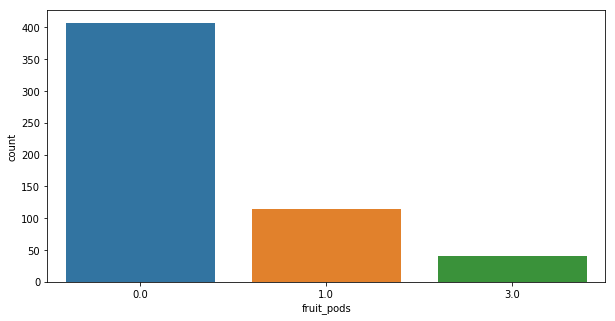

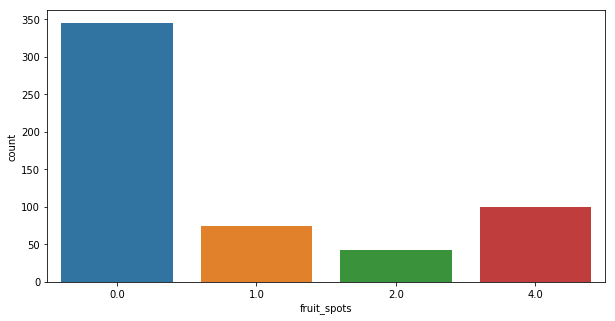

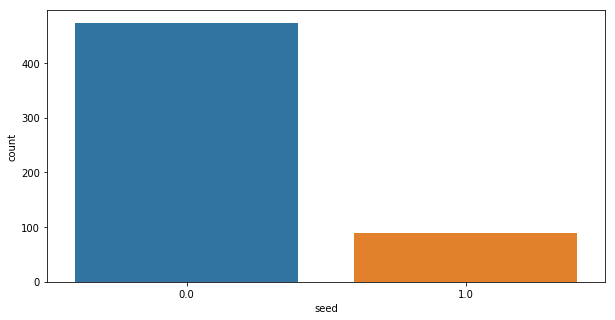

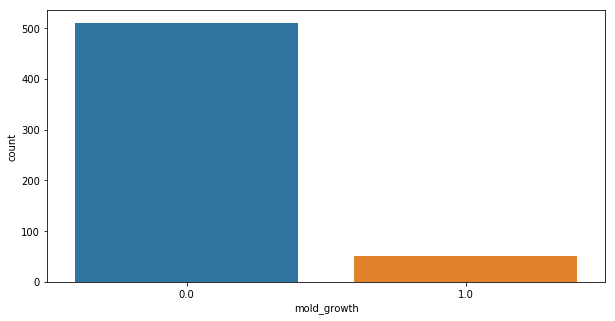

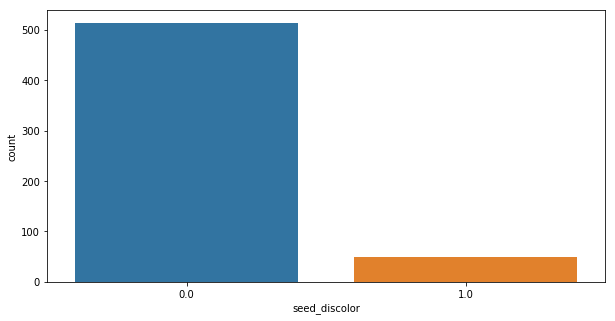

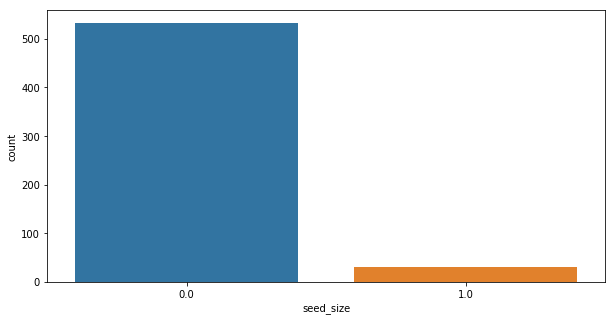

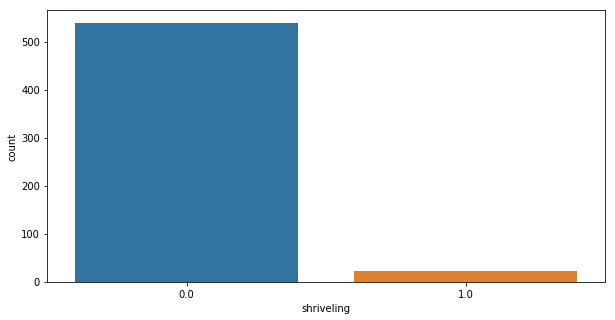

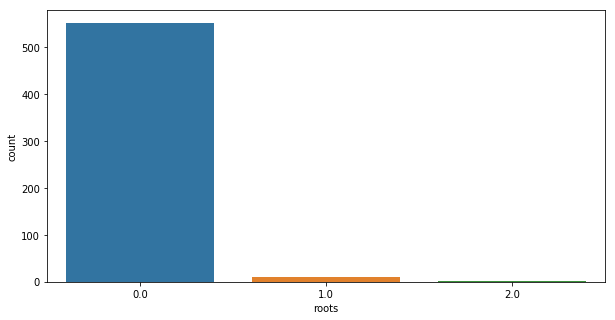

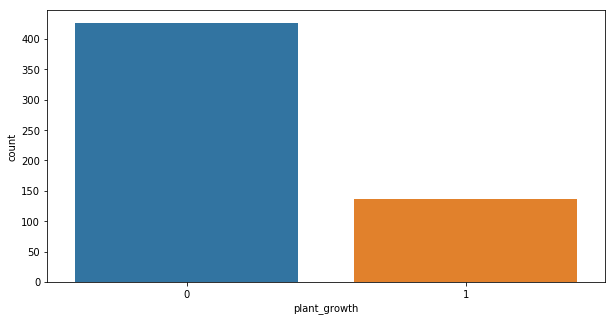

In [35]:
for number,col in enumerate(data_as_frame.columns):
    plt.figure(figsize=(10,5))
    sns.countplot(data_as_frame[col])


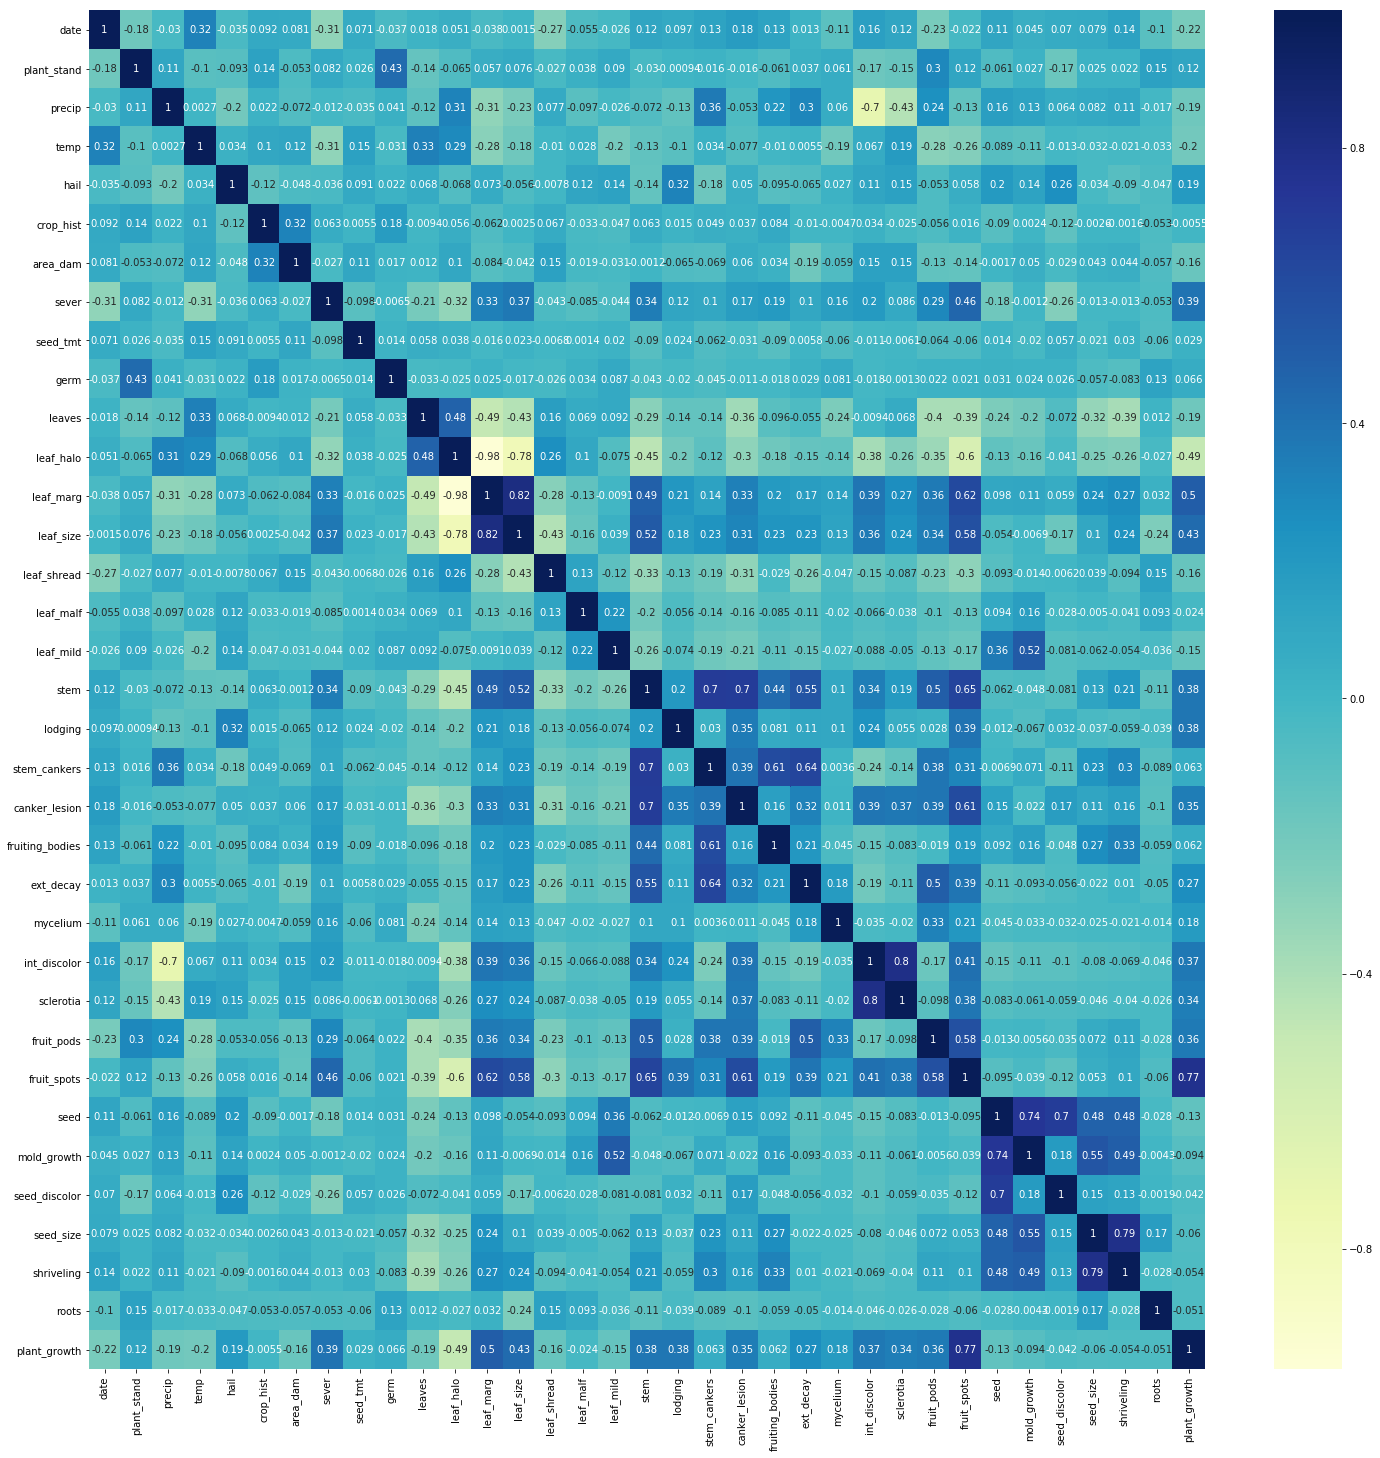

In [36]:
plt.figure(figsize=(25,25))
hm=sns.heatmap(data_as_frame.corr().values, annot=True, center=0, xticklabels=data_as_frame.columns,
               yticklabels=data_as_frame.columns, cmap='YlGnBu')

In [37]:
abs(data_as_frame[data_as_frame.columns].corr()['plant_growth']).sort_values(ascending=False)

plant_growth       1.000000
fruit_spots        0.770708
leaf_marg          0.504618
leaf_halo          0.488323
leaf_size          0.431681
sever              0.392119
lodging            0.376595
stem               0.375924
int_discolor       0.370130
fruit_pods         0.360943
canker_lesion      0.350937
sclerotia          0.339978
ext_decay          0.265788
date               0.221519
temp               0.203498
hail               0.191394
precip             0.186112
leaves             0.185609
mycelium           0.183854
area_dam           0.157982
leaf_shread        0.157101
leaf_mild          0.147817
seed               0.131293
plant_stand        0.119432
mold_growth        0.094393
germ               0.065864
stem_cankers       0.063049
fruiting_bodies    0.062164
seed_size          0.060247
shriveling         0.053806
roots              0.050581
seed_discolor      0.042084
seed_tmt           0.029464
leaf_malf          0.023699
crop_hist          0.005538
Name: plant_growth, 

In [38]:
data_as_frame.describe()

,date,plant_stand,precip,temp,hail,crop_hist,area_dam,sever,seed_tmt,germ,...,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots,plant_growth
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,...,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,3.745552,0.382562,1.587189,1.149466,0.225979,1.877224,1.633452,0.733096,0.519573,1.055160,...,0.035587,0.418149,0.994662,0.158363,0.092527,0.087189,0.053381,0.040925,0.021352,0.241993
std,1.659314,0.486446,0.711790,0.619707,0.418598,0.977946,1.109424,0.597028,0.612241,0.789063,...,0.185424,0.819476,1.514625,0.365406,0.290026,0.282363,0.224992,0.198294,0.156521,0.428672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [39]:
# group by Level to see the ratio
data_as_frame['plant_growth'].value_counts()


0    426
1    136
Name: plant_growth, dtype: int64

In [40]:
data_as_frame.shape

(562, 35)

In [41]:
data_as_frame.head(20)

,date,plant_stand,precip,temp,hail,crop_hist,area_dam,sever,seed_tmt,germ,...,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots,plant_growth
0,6,0.0,2.0,1.0,0.0,1,1,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,4,0.0,2.0,1.0,0.0,2,0,2.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,0.0,2.0,1.0,0.0,1,0,2.0,1.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,2.0,1.0,0.0,1,0,2.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6,0.0,2.0,1.0,0.0,2,0,1.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,5,0.0,2.0,1.0,0.0,3,0,1.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,5,0.0,2.0,1.0,0.0,2,0,1.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,4,0.0,2.0,1.0,1.0,1,0,1.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,6,0.0,2.0,1.0,0.0,3,0,1.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,4,0.0,2.0,1.0,0.0,2,0,2.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [42]:
# save the cleaned data
cdata_file_path = os.path.join(out_dir,cdata_fname)
data_as_frame.to_csv(cdata_file_path,index=False)


In [43]:
X = data_as_frame.drop('plant_growth', axis=1)
Y = data_as_frame['plant_growth']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [44]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(449, 34) (449,) (113, 34) (113,)


In [45]:
train_data = pd.concat([x_train, y_train], axis=1, join='inner')
test_data = pd.concat([x_test, y_test], axis=1, join='inner')


In [46]:
#to save train & test data
train_data.to_csv(os.path.join(out_dir,train_data_fname), index=False)
test_data.to_csv(os.path.join(out_dir,test_data_fname), index=False)

In [47]:
# Random Forest Implementation
forest = RandomForestClassifier(n_estimators=600)

In [48]:
# to train the model
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
predictions = forest.predict(x_test)

In [50]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        86
           1       0.88      0.85      0.87        27

   micro avg       0.94      0.94      0.94       113
   macro avg       0.92      0.91      0.91       113
weighted avg       0.94      0.94      0.94       113



In [52]:
cm = confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[83  3]
 [ 4 23]]


In [53]:
TN, FP, FN, TP = cm.ravel()

In [54]:
print("True Negative : %d" %TN)
print("False Positive : %d" %FP)
print("False Negative : %d" %FN)
print("True Positive : %d" %TP)

True Negative : 83
False Positive : 3
False Negative : 4
True Positive : 23


In [55]:
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [56]:
print("-"*30)
print("Overall Accuracy : %f" %ACC)
print("-"*30)

------------------------------
Overall Accuracy : 0.938053
------------------------------
